In [1]:
""

''

In [11]:
## 기본모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
## 모듈 import
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [12]:
## dataset 정리
(X_train_full, y_train_full),(X_test,y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full,y_train_full,test_size =.2)

In [14]:
print(X_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


2

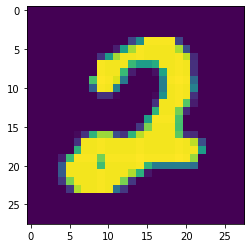

In [23]:
plt.imshow(X_train[0])
y_train[0]

In [24]:
X_train.shape

(48000, 28, 28)

In [27]:
x = X_train.reshape(-1,784*1000)

In [30]:
y = x.reshape(48000,28,28)

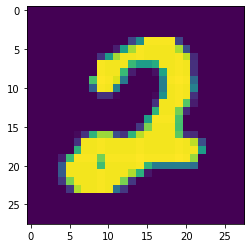

In [31]:
plt.imshow(y[0])

In [32]:
# X데이터 정리
X_train = X_train.reshape(-1,784)
X_val = X_val.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [37]:
# y데이터 확인 정리
np.unique(y_train).size
# categorical 데이터 확인
# one-hot 변환
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [76]:
## 모델 생성
model1 = Sequential()
l1 = Dense(1024,activation='relu',input_dim=784)
l2 = Dense(512,activation='sigmoid')
out = Dense(10,activation='softmax')
model1.add(l1)
model1.add(l2)
model1.add(out)

In [43]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [81]:
## 모델 설정
optimizer = 'sgd'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = metrics
)

In [78]:
## 모델학습
model1.fit(
    X_val,
    y_val,
    epochs = 10,
    validation_data = (X_train, y_train)
)

Epoch 1/10
375/375 [==============================] - 10s 26ms/step - loss: 0.7183 - accuracy: 0.8158 - val_loss: 0.4191 - val_accuracy: 0.8917
Epoch 2/10
375/375 [==============================] - 9s 25ms/step - loss: 0.3481 - accuracy: 0.9087 - val_loss: 0.3219 - val_accuracy: 0.9128
Epoch 3/10
375/375 [==============================] - 10s 26ms/step - loss: 0.2643 - accuracy: 0.9294 - val_loss: 0.2830 - val_accuracy: 0.9227
Epoch 4/10
375/375 [==============================] - 9s 25ms/step - loss: 0.2237 - accuracy: 0.9402 - val_loss: 0.2508 - val_accuracy: 0.9277
Epoch 5/10
375/375 [==============================] - 9s 25ms/step - loss: 0.1855 - accuracy: 0.9508 - val_loss: 0.2274 - val_accuracy: 0.9355
Epoch 6/10
375/375 [==============================] - 9s 25ms/step - loss: 0.1620 - accuracy: 0.9574 - val_loss: 0.2095 - val_accuracy: 0.9396
Epoch 7/10
375/375 [==============================] - 10s 26ms/step - loss: 0.1362 - accuracy: 0.9638 - val_loss: 0.1956 - val_accuracy: 0.9

In [50]:
## test 정확도 검증
model1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0785 - accuracy: 0.9750


[0.07854876667261124, 0.9750000238418579]

In [59]:
np.sum(np.argmax(y_test,axis=1) == np.argmax(model1.predict(X_test),axis=1))/len(y_test)

313/313 [==============================] - 1s 4ms/step


0.975

In [73]:
## 활용
def mnist_test(x):
    ind = np.random.choice(np.arange(len(X_test)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.argmax(model1.predict(X_test[[i]]))
        real = np.argmax(y_test[i])
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real}  예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()
    print('\n',f' 총 {size}를 예측한 결과 예측률은 {score} %')

1/1 [==============================] - 0s 22ms/step
정답은 ===> 1  예측은 ===> 1 결과는 ===> 맞음


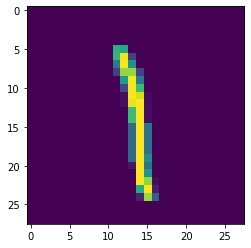

1/1 [==============================] - 0s 20ms/step
정답은 ===> 6  예측은 ===> 6 결과는 ===> 맞음


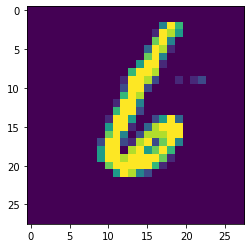

1/1 [==============================] - 0s 24ms/step
정답은 ===> 4  예측은 ===> 4 결과는 ===> 맞음


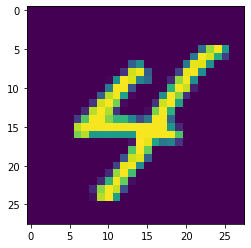

1/1 [==============================] - 0s 21ms/step
정답은 ===> 1  예측은 ===> 1 결과는 ===> 맞음


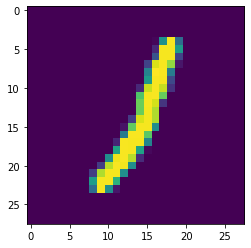

1/1 [==============================] - 0s 28ms/step
정답은 ===> 3  예측은 ===> 3 결과는 ===> 맞음


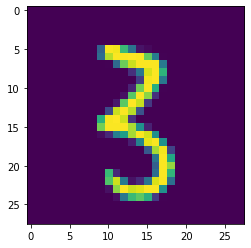

1/1 [==============================] - 0s 35ms/step
정답은 ===> 0  예측은 ===> 0 결과는 ===> 맞음


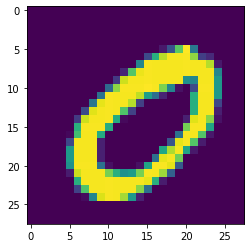

1/1 [==============================] - 0s 34ms/step
정답은 ===> 3  예측은 ===> 3 결과는 ===> 맞음


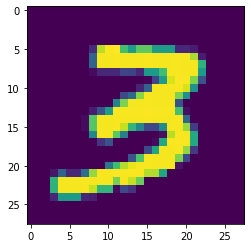

1/1 [==============================] - 0s 31ms/step
정답은 ===> 0  예측은 ===> 0 결과는 ===> 맞음


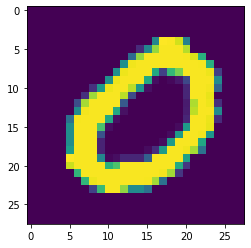

1/1 [==============================] - 0s 26ms/step
정답은 ===> 1  예측은 ===> 1 결과는 ===> 맞음


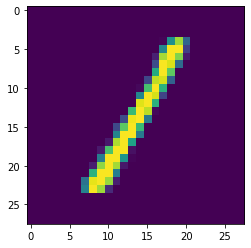

1/1 [==============================] - 0s 23ms/step
정답은 ===> 5  예측은 ===> 5 결과는 ===> 맞음


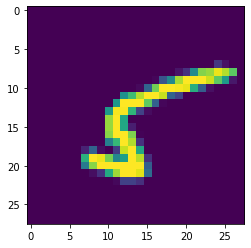


  총 10를 예측한 결과 예측률은 11111111110.000002 %


In [74]:
mnist_test(10)

In [79]:
model2 = Sequential()

In [ ]:
model2.compile(optimizer='sgd',
              loss = 'binary_crossentropy')

In [82]:
from keras.datasets import mnist

In [83]:
(X_train_full, y_train_full) , (X_test, y_test) = mnist.load_data()

In [86]:
y_train_full = np.where((y_train_full == 1) | (y_train_full == 7) | (y_train_full == 9)
                        ,1,0)
y_test =  np.where((y_test == 1) | (y_test == 7) | (y_test == 9)
                        ,1,0)

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full,test_size=.2)

In [88]:
X_train = X_train.reshape(-1,28*28)
X_val = X_val.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [99]:
model2 = Sequential()
model2.add(Dense(1024,activation='relu',input_shape=(784,)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(512,activation='relu'))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [100]:
model2.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [101]:
model2.fit(X_train,
          y_train,
          epochs=10,
          batch_size = 400,
          validation_data = (X_val,y_val),
          verbose = 1)

Epoch 1/10
120/120 [==============================] - 4s 33ms/step - loss: 0.2109 - accuracy: 0.9224 - val_loss: 0.1410 - val_accuracy: 0.9517
Epoch 2/10
120/120 [==============================] - 4s 31ms/step - loss: 0.1140 - accuracy: 0.9633 - val_loss: 0.1041 - val_accuracy: 0.9653
Epoch 3/10
120/120 [==============================] - 4s 33ms/step - loss: 0.0936 - accuracy: 0.9701 - val_loss: 0.0925 - val_accuracy: 0.9697
Epoch 4/10
120/120 [==============================] - 4s 34ms/step - loss: 0.0822 - accuracy: 0.9739 - val_loss: 0.0846 - val_accuracy: 0.9722
Epoch 5/10
120/120 [==============================] - 4s 33ms/step - loss: 0.0747 - accuracy: 0.9770 - val_loss: 0.0790 - val_accuracy: 0.9739
Epoch 6/10
120/120 [==============================] - 4s 33ms/step - loss: 0.0681 - accuracy: 0.9781 - val_loss: 0.0745 - val_accuracy: 0.9758
Epoch 7/10
120/120 [==============================] - 4s 32ms/step - loss: 0.0632 - accuracy: 0.9803 - val_loss: 0.0709 - val_accuracy: 0.9768

In [102]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0629 - accuracy: 0.9794


[0.06291022151708603, 0.9793999791145325]

In [104]:
def mnist_test1(x):
    ind = np.random.choice(np.arange(len(X_test)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.where(model2.predict(X_test[[i]]) >0.5,1,0)
        real = np.where(y_test[i]>0.5,1,0)
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real}  예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()

In [103]:
model2.predict(X_test[0:1])

1/1 [==============================] - 0s 97ms/step


array([[0.99862534]], dtype=float32)

1/1 [==============================] - 0s 21ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


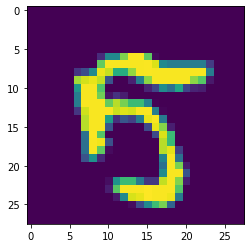

1/1 [==============================] - 0s 23ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


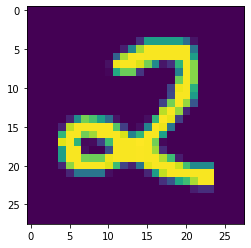

1/1 [==============================] - 0s 20ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


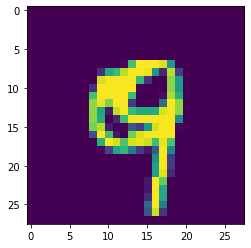

1/1 [==============================] - 0s 22ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


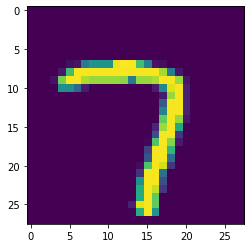

1/1 [==============================] - 0s 31ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


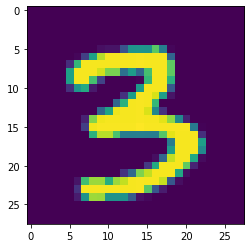

1/1 [==============================] - 0s 21ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


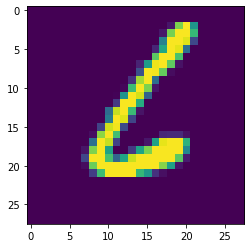

1/1 [==============================] - 0s 34ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


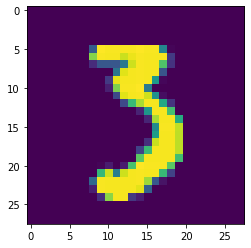

1/1 [==============================] - 0s 37ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


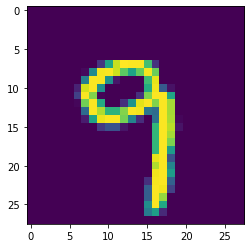

1/1 [==============================] - 0s 23ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


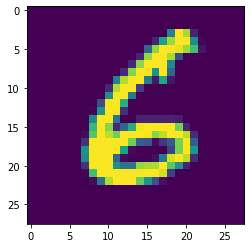

1/1 [==============================] - 0s 20ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


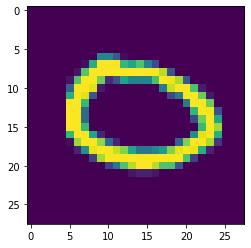

In [105]:
mnist_test1(10)

In [144]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [145]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

In [146]:
print(X_train_full.shape)
print(y_train_full.shape)
print(np.unique(y_train_full).size)

(60000, 28, 28)
(60000,)
10


In [147]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [148]:
x1 = X_train.shape[1]
x2 = X_train.shape[2]
X_train = X_train.reshape(-1,x1*x2)
X_val = X_val.reshape(-1,x1*x2)
X_test = X_test.reshape(-1,x1*x2)

In [149]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [150]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
print(input_shape)
print(output_shape)

(784,)
10


In [157]:
model1 = Sequential()
model1.add(Dense(1024,activation='relu',input_shape=input_shape))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(output_shape,activation='softmax'))

In [158]:
model2 = Sequential(
    [
        Dense(1024,activation='relu',input_shape=input_shape),
        Dense(512,activation='relu'),
        Dense(output_shape,activation='softmax')
    ]
)

In [159]:
input_ = Input(shape=input_shape)
l1 = Dense(1024,activation='relu')(input_)
l2 = Dense(512,activation='relu')(l1)
output_ = Dense(output_shape,activation='softmax')(l2)
model3 = Model(inputs=[input_],outputs=[output_])

In [160]:
optimizer = RMSprop()
loss = CategoricalCrossentropy()
metrics = ['accuracy']

In [161]:
model1.compile(optimizer=optimizer,
              loss =loss,
              metrics=metrics)
model2.compile(optimizer=optimizer,
              loss =loss,
              metrics=metrics)
model3.compile(optimizer=optimizer,
              loss =loss,
              metrics=metrics)

In [162]:
model1.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          validation_data=(X_val,y_val))
model2.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          validation_data=(X_val,y_val))
model3.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          validation_data=(X_val,y_val))
model1_result = model1.evaluate(X_test,y_test)
model2_result = model2.evaluate(X_test,y_test)
model3_result = model3.evaluate(X_test,y_test)

Epoch 1/10
113/113 [==============================] - 5s 36ms/step - loss: 17.6642 - accuracy: 0.8415 - val_loss: 0.8124 - val_accuracy: 0.9209
Epoch 2/10
113/113 [==============================] - 4s 35ms/step - loss: 0.5004 - accuracy: 0.9355 - val_loss: 0.8042 - val_accuracy: 0.9051
Epoch 3/10
113/113 [==============================] - 4s 35ms/step - loss: 0.2749 - accuracy: 0.9546 - val_loss: 0.4935 - val_accuracy: 0.9449
Epoch 4/10
113/113 [==============================] - 4s 35ms/step - loss: 0.2133 - accuracy: 0.9642 - val_loss: 0.3189 - val_accuracy: 0.9566
Epoch 5/10
113/113 [==============================] - 4s 36ms/step - loss: 0.1737 - accuracy: 0.9706 - val_loss: 0.3743 - val_accuracy: 0.9511
Epoch 6/10
113/113 [==============================] - 4s 37ms/step - loss: 0.1614 - accuracy: 0.9754 - val_loss: 0.6003 - val_accuracy: 0.9511
Epoch 7/10
113/113 [==============================] - 4s 37ms/step - loss: 0.1508 - accuracy: 0.9777 - val_loss: 0.4613 - val_accuracy: 0.960

In [164]:
y_train.shape

(45000, 10)

In [168]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
model1 = Sequential()
l1 = Dense(1024,input_shape=input_shape,activation='sigmoid')
l2 = Dense(512,activation='sigmoid')
out = Dense(output_shape,activation='softmax')
model1.add(l1)
model1.add(l2)
model1.add(out)

model2 = Sequential(
    [
        l1,
        l2,
        out
    ]
)

input_ = Input(shape=input_shape)
layer1 = l1(input_)
layer2 = l2(layer1)
output = out(layer2)
model3 = Model(inputs=[input_], outputs=[output])


In [174]:
model1.layers[0].get_weights()[0]

array([[-0.04523145, -0.03073665, -0.0227039 , ...,  0.00571657,
        -0.01155359, -0.02175279],
       [-0.01473438,  0.01236295,  0.03163855, ...,  0.0365823 ,
        -0.03789914,  0.01962724],
       [ 0.03441209,  0.03784008,  0.04766291, ..., -0.01657515,
        -0.05625604, -0.02769805],
       ...,
       [ 0.01139086,  0.02396224, -0.04952996, ..., -0.0186881 ,
        -0.04701392,  0.03603585],
       [-0.03400251, -0.04431015, -0.05409775, ...,  0.04818647,
         0.03027376,  0.00537375],
       [-0.00904946, -0.01282411,  0.01376864, ..., -0.03403715,
        -0.02489494,  0.02600482]], dtype=float32)

In [179]:
model2.layers[0].set_weights([model1.layers[0].get_weights()[0],
                             model1.layers[0].get_weights()[1]])

In [185]:
model2.layers

In [186]:
for i in range(len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])
    model3.layers[i+1].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])

In [190]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
model1.compile(optimizer=optimizer,
              loss = loss)
model2.compile(optimizer=optimizer,
              loss = loss)
model3.compile(optimizer=optimizer,
              loss = loss)

In [191]:
model1.fit(X_train, y_train,epochs= 10, batch_size=100,verbose=0)
model2.fit(X_train, y_train,epochs= 10, batch_size=100,verbose=0)
model3.fit(X_train, y_train,epochs= 10, batch_size=100,verbose=0)
print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 2s 5ms/step - loss: 0.0966
0.09661896526813507
313/313 [==============================] - 2s 5ms/step - loss: 0.0966
0.09661896526813507
313/313 [==============================] - 2s 5ms/step - loss: 0.0966
0.09661896526813507


In [192]:
print(np.sum(np.argmax(model1.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test))
print(np.sum(np.argmax(model2.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test))
print(np.sum(np.argmax(model3.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test))

313/313 [==============================] - 2s 5ms/step
0.9751
313/313 [==============================] - 2s 5ms/step
0.9751
313/313 [==============================] - 2s 5ms/step
0.9751


In [193]:
l_1_w = model1.layers[0].get_weights()[0]
l_1_b = model1.layers[0].get_weights()[1]
#sigmoid
l_2_w = model1.layers[1].get_weights()[0]
l_2_b = model1.layers[1].get_weights()[1]
#sigmoid
l_3_w = model1.layers[2].get_weights()[0]
l_3_b = model1.layers[2].get_weights()[1]

In [195]:
a = np.dot(X_test,l_1_w)+l_1_b
a = 1/(1+np.exp(-a))
a = np.dot(a,l_2_w) + l_2_b
a = 1/(1+np.exp(-a))
a = np.dot(a,l_3_w) + l_3_b

<ipython-input-195-2b869c389bc7>:2: RuntimeWarning: overflow encountered in exp
  a = 1/(1+np.exp(-a))


In [197]:
np.sum(np.argmax(a,axis=1) == np.argmax(y_test,axis=1))/len(y_test)

0.9751

In [202]:
from keras.models import load_model, save_model

In [204]:
save_model(model1,'model1.h6')
save_model(model2,'model2.h5')

INFO:tensorflow:Assets written to: model1.h6\assets


In [205]:
model1_1 = load_model('model1.h6')
model2_1 = load_model('model2.h5')

In [206]:
model1_1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0966


0.09661896526813507

In [207]:
model2_1.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0966


0.09661896526813507

In [208]:
save_model(model3,'model3.h7')

INFO:tensorflow:Assets written to: model3.h7\assets


In [222]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
model1 = Sequential(
    [
      Dense(1024,input_shape=input_shape,activation='relu'),
      Dense(512,activation='relu'),
      Dense(output_shape,activation='softmax')   
    ]
)
model2 = Sequential(
    [
      Dense(1024,input_shape=input_shape,activation='relu'),
      Dense(512,activation='relu'),
      Dense(output_shape,activation='softmax')   
    ]
)
model3 = Sequential(
    [
      Dense(1024,input_shape=input_shape,activation='relu'),
      Dense(512,activation='relu'),
      Dense(output_shape,activation='softmax')   
    ]
)

In [213]:
np.zeros_like(model1.layers[0].get_weights()[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [223]:
model1.layers[0].set_weights([np.ones_like(model1.layers[0].get_weights()[0]),
                             np.zeros_like(model1.layers[0].get_weights()[1])])

In [224]:
model2.layers[1].set_weights([np.ones_like(model2.layers[1].get_weights()[0]),
                             np.zeros_like(model2.layers[1].get_weights()[1])])

In [219]:
np.sum(model2.layers[1].get_weights()[0]) == model2.layers[1].get_weights()[0].size

True

In [225]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
model2.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
model3.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [226]:
model1.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          verbose=0)
model2.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          verbose=0)
model3.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          verbose=0)
print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 2s 4ms/step - loss: 2.3010 - accuracy: 0.1135
[2.301032781600952, 0.11349999904632568]
313/313 [==============================] - 2s 5ms/step - loss: 1.7891 - accuracy: 0.3751
[1.7891172170639038, 0.3750999867916107]
313/313 [==============================] - 2s 4ms/step - loss: 0.3844 - accuracy: 0.9700
[0.384392648935318, 0.9700000286102295]


In [227]:
from keras.datasets import fashion_mnist

In [228]:
fashion_dict = {0 : "T-shirt/top",
1 : "Trouser",
2 : "Pullover",
3 : "Dress",
4 : "Coat",
5 : "Sandal",
6 : "Shirt",
7 : "Sneaker",
8 : "Bag",
9 : "Ankel boot",}

In [240]:
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()

In [241]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

Pullover


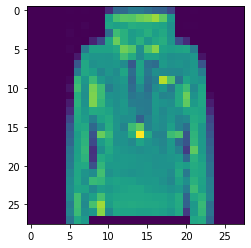

In [242]:
plt.imshow(X_train[0])
print(fashion_dict[y_train[0]])

In [243]:
from keras.layers import Flatten

In [244]:
y_train = to_categorical(y_train) 
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [255]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
model1 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation='relu'),
        Dense(1024,activation='relu'),
        Dense(512,activation='relu'),
        Dense(output_shape,activation='softmax')
    ]
)

model2 = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(2048,activation='relu'),
        Dense(1024,activation='relu'),
        Dense(512,activation='relu'),
        Dense(256,activation='relu'),
        Dense(128,activation='relu'),
        Dense(output_shape,activation='softmax')
    ]
)



In [256]:
optimizer = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

model1.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)
model2.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)


model1.fit(X_train,
              y_train,
              epochs=10,
              batch_size=400,
            verbose=0
          )
model2.fit(X_train,
              y_train,
              epochs=10,
              batch_size=400,
          verbose=0)

In [257]:
print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))

313/313 [==============================] - 3s 9ms/step - loss: 0.5742 - accuracy: 0.8120
[0.5741887092590332, 0.8119999766349792]
313/313 [==============================] - 3s 10ms/step - loss: 0.4505 - accuracy: 0.8516
[0.4505331516265869, 0.8515999913215637]


In [264]:
model1 = Sequential()
model1.add(Flatten(input_shape=input_shape))
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(256,activation='relu'))
model1.add(Dense(output_shape,activation='softmax'))

model2 = Sequential()
model2.add(Flatten(input_shape=input_shape))
model2.add(Dense(1024,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(output_shape,activation='softmax'))

In [265]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model1.compile(
    optimizer=optimizer,
    loss = loss,
    metrics= metrics
)
model2.compile(
    optimizer=optimizer,
    loss = loss,
    metrics= metrics
)

In [272]:
model1_s = datetime.now()
model1.fit(X_train,
          y_train,
          epochs=30,
          batch_size=len(X_train),
          verbose=0)
model1_e = datetime.now()
model1_t = model1_e - model1_s

model2_s = datetime.now()
model2.fit(X_train,
          y_train,
          epochs=30,
          batch_size=400,
          verbose=0)
model2_e = datetime.now()
model2_t = model2_e - model2_s

print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model1_t,"\n")
print(model2_t)

313/313 [==============================] - 2s 5ms/step - loss: 1.3103 - accuracy: 0.7850
[1.3102736473083496, 0.7850000262260437]
313/313 [==============================] - 2s 5ms/step - loss: 0.4801 - accuracy: 0.8774
[0.480099618434906, 0.8773999810218811]
0:01:00.765404 

0:01:44.038159


In [275]:
l1

[array([[ 0.03098395,  0.03863452, -0.04675616, ..., -0.0179703 ,
         -0.01537847,  0.02312119],
        [-0.05232899,  0.00252084, -0.00076674, ...,  0.03409579,
          0.02484371, -0.0392061 ],
        [ 0.00936682, -0.03116682, -0.04974407, ..., -0.01114193,
          0.01781254,  0.02298941],
        ...,
        [ 0.01405911,  0.05653923, -0.05633693, ...,  0.03443453,
          0.04091217,  0.00708621],
        [ 0.02278691,  0.02413591, -0.01519307, ..., -0.04748338,
          0.03720074, -0.00878951],
        [ 0.01062496, -0.03481041, -0.02014375, ..., -0.05644866,
         -0.02163725,  0.00929066]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [277]:
model = Sequential(
    [
        Flatten(input_shape=input_shape),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(output_shape,activation='softmax'),]
)
batch_size = [len(X_train),int(len(X_train)/2),int(len(X_train)/4),
             int(len(X_train)/8),int(len(X_train)/16)]

elapse_time = []
accuracy = []
l1 = [model.layers[1].get_weights()[0],model.layers[1].get_weights()[1]] 
l2 = [model.layers[2].get_weights()[0],model.layers[2].get_weights()[1]]
l3 = [model.layers[3].get_weights()[0],model.layers[3].get_weights()[1]]
l4 = [model.layers[4].get_weights()[0],model.layers[4].get_weights()[1]]

for i in range(len(batch_size)):
    model.layers[1].set_weights(l1)
    model.layers[2].set_weights(l2)
    model.layers[3].set_weights(l3)
    model.layers[4].set_weights(l4)
    optimizer = 'adam'
    loss = 'categorical_crossentropy'
    metrics = ['accuracy']
    model.compile(optimizer=optimizer,
                 loss=loss,
                 metrics=metrics)
    st_time = datetime.now()
    model.fit(X_train, 
             y_train,
             epochs=20,
             batch_size=batch_size[i],
             verbose=0)
    ed_time = datetime.now()
    elapse_time.append(ed_time-st_time)
    acc = np.sum(np.argmax(model.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/len(y_test)
    accuracy.append(acc)

result = {'batch_size':batch_size,'time':elapse_time,'accuracy':accuracy}

313/313 [==============================] - 2s 5ms/step


In [278]:
pd.DataFrame(result)

,batch_size,time,accuracy
0,45000,0 days 00:00:41.274426,0.6689
1,22500,0 days 00:00:43.189994,0.7470
2,11250,0 days 00:00:45.275403,0.7440
3,5625,0 days 00:00:47.147404,0.8224
4,2812,0 days 00:00:49.993741,0.8258


In [ ]:
model.layers[1].set_weights(l1)
model.layers[2].set_weights(l2)
model.layers[3].set_weights(l3)
model.layers[4].set_weights(l4)
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)
st_time = datetime.now()
model.fit(X_train, 
         y_train,
         epochs=20,
         batch_size=1,
         verbose=0)
ed_time = datetime.now()
elaps = ed_time - st_time

In [270]:
model = Sequential(
    [
        Flatten(input_shape=input_shape),
        Dense(1024,activation='relu'),
        Dense(512,activation='relu'),
        Dense(256,activation='relu'),
        Dense(128,activation='relu'),
        Dense(output_shape,activation='softmax'),
    ]
)

In [271]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = accuracy
model.compile(optimizer = optimizer,
              loss = loss,
              metrics = metrics)

datetime.timedelta(seconds=3, microseconds=37487)

In [ ]:
model.fit(X_train,y_train,epochs = 30,validation_data = (X_val, y_val), batch_size=1000)

In [ ]:
plt.plot(np.arange(1,31), model.history.history['accuracy'])
plt.plot(np.arange(1,31), model.history.history['val_accuracy'])
plt.show()